In [1]:
import torch
import torch.nn.functional as F
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
from load_data import CSAWS, InferenceDataset
from utils import *
from config import *

/home/phanthc/miniforge3/envs/csaws-segment/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Test Prediction Visualization

In [31]:
model_file = BEST_MODEL_DIR
model_name = model_file.split('/')[-1].split('.')[0]

test_image_dir = TEST_IMAGE
test_mask_dir = TEST_MASK
test_transform = TEST_TRANSFORM
test_dataset = CSAWS(test_image_dir, test_mask_dir, test_transform)

test_pred_dir = os.path.join(PRED_DIR, model_name)
test_set_size = len(os.listdir(test_image_dir))
print('Test set size:', test_set_size)

Test set size: 26


In [32]:
def plot_figure(id, image, color_mask, color_mask_predict):
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(unorm(image).permute(1, 2, 0).cpu(), cmap='gray') 
        plt.title(f'Original Image {id}')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(color_mask)
        plt.title(f'True Mask {id}')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(color_mask_predict)
        plt.title(f'Predicted Mask {id}')
        plt.axis('off')
        
        plt.show()

In [35]:
def visualize_predictions(test_dataset, test_pred_dir):
    for id in range(len(test_dataset)):
        image, mask = test_dataset[id]
        pred = Image.open(os.path.join(test_pred_dir, f'{id}.png'))

        color_mask = np.zeros((*mask.shape, 3), dtype=np.uint8)
        for i, color in enumerate(CUSTOM_COLORMAP):
            color_mask[mask == i] = np.array(color)


        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(unorm(image).permute(1, 2, 0).cpu(), cmap='gray') 
        plt.title(f'Original Image {id}')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(color_mask)
        plt.title(f'True Mask {id}')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(pred)
        plt.title(f'Predicted Mask {id}')
        plt.axis('off')
        
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


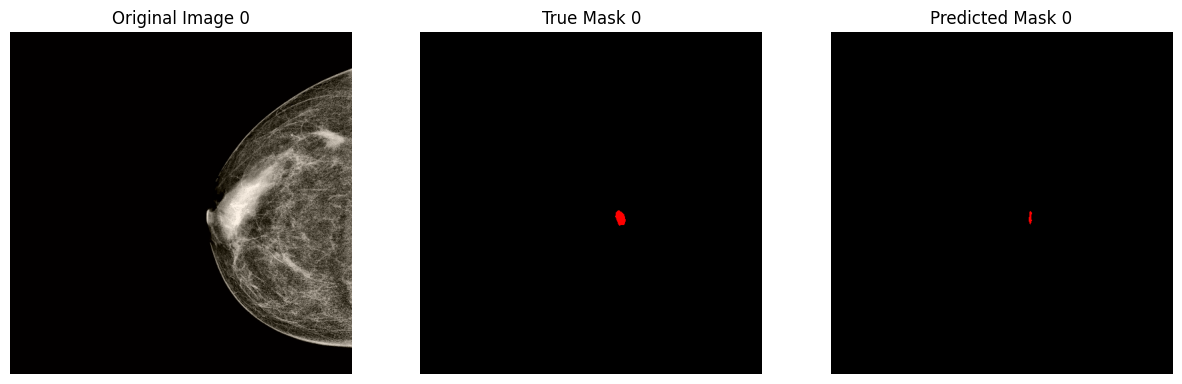

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


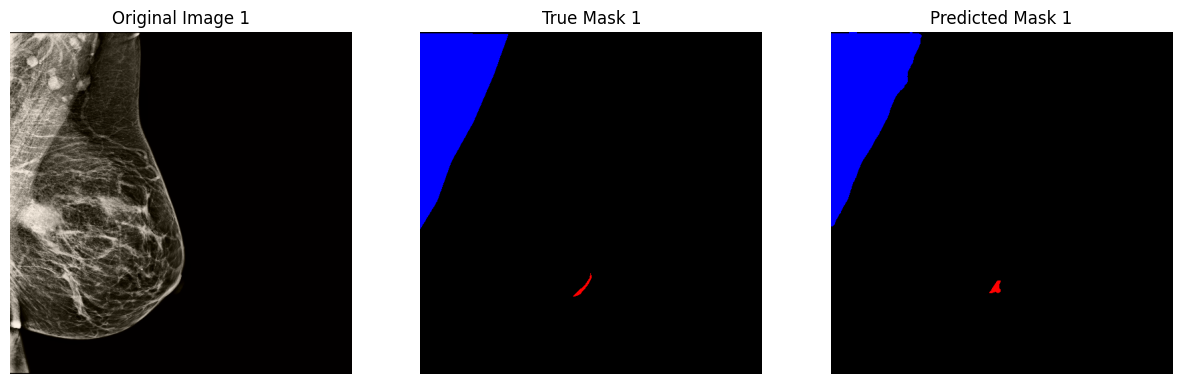

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


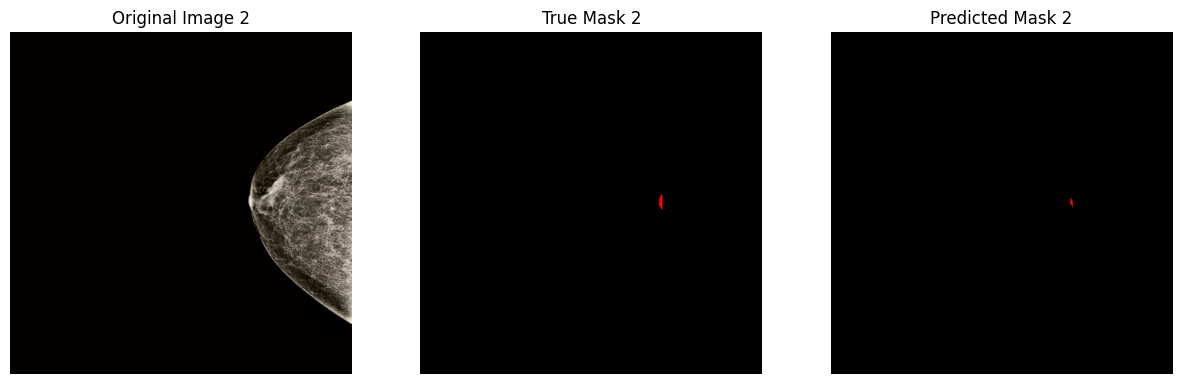

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


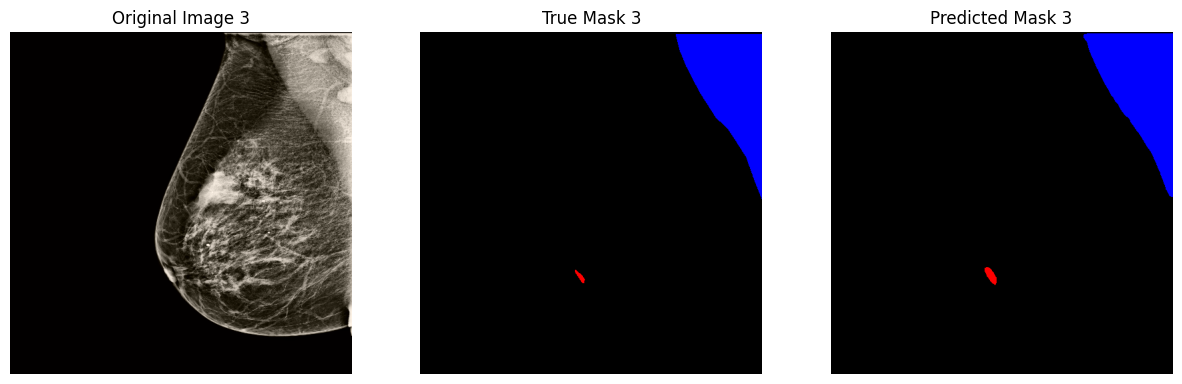

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


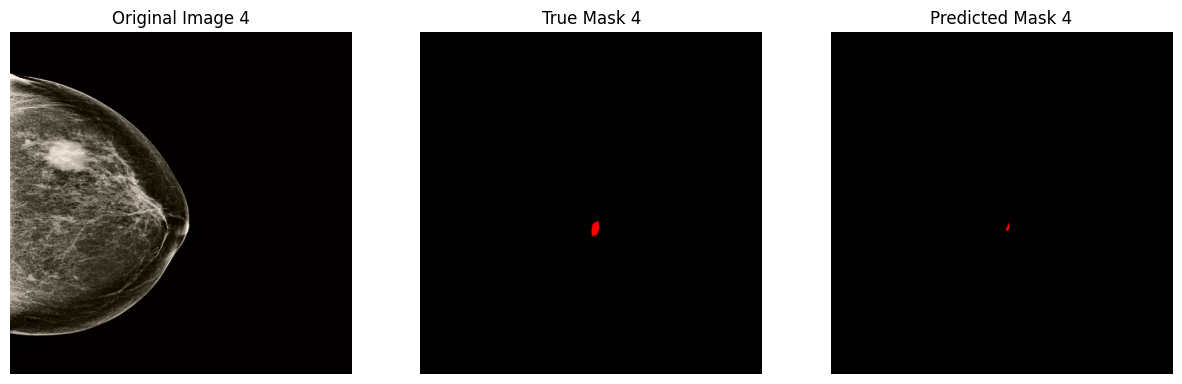

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


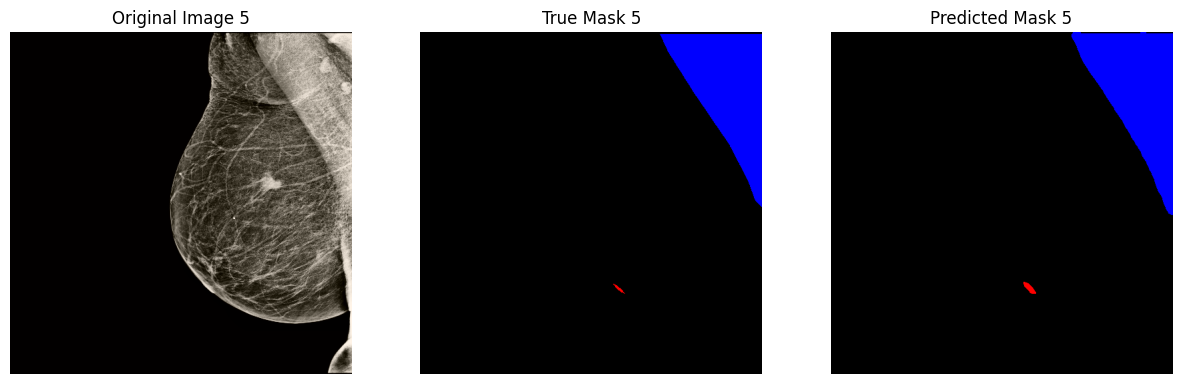

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


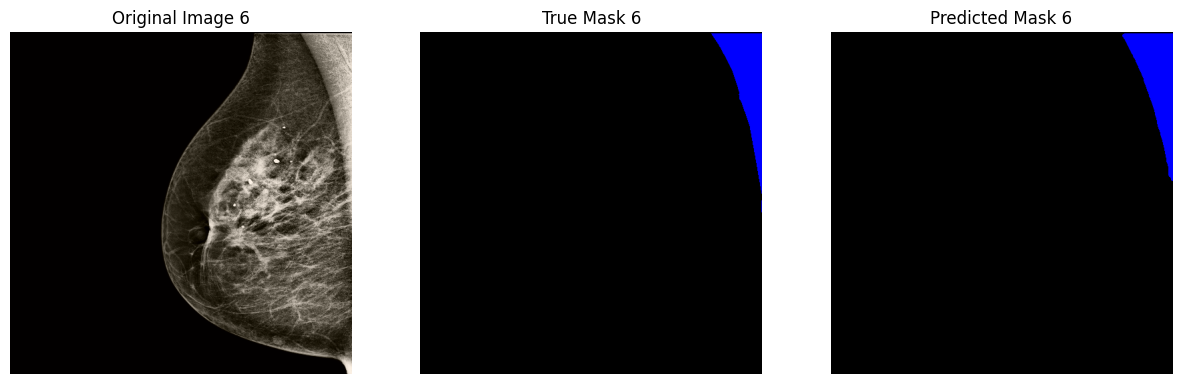

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


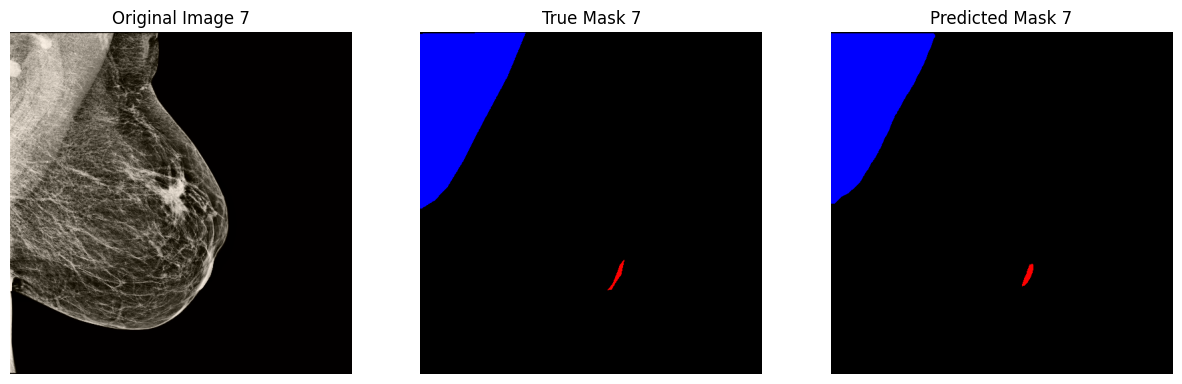

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


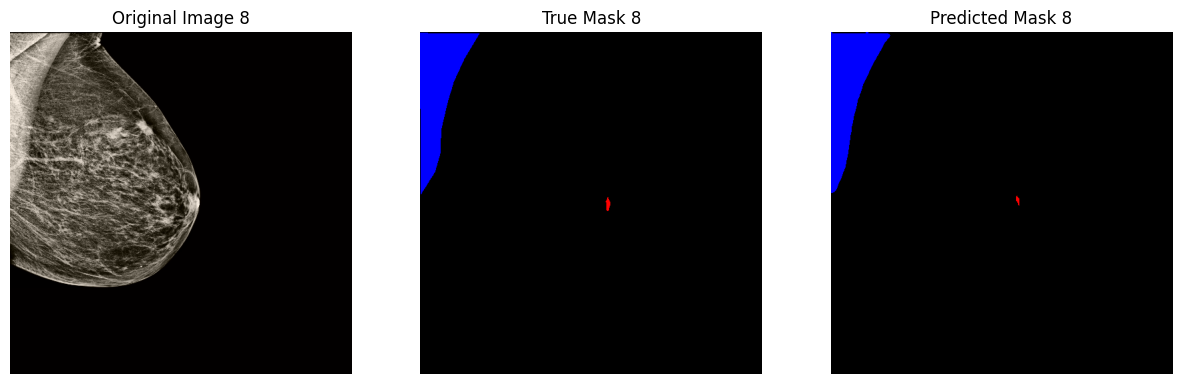

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


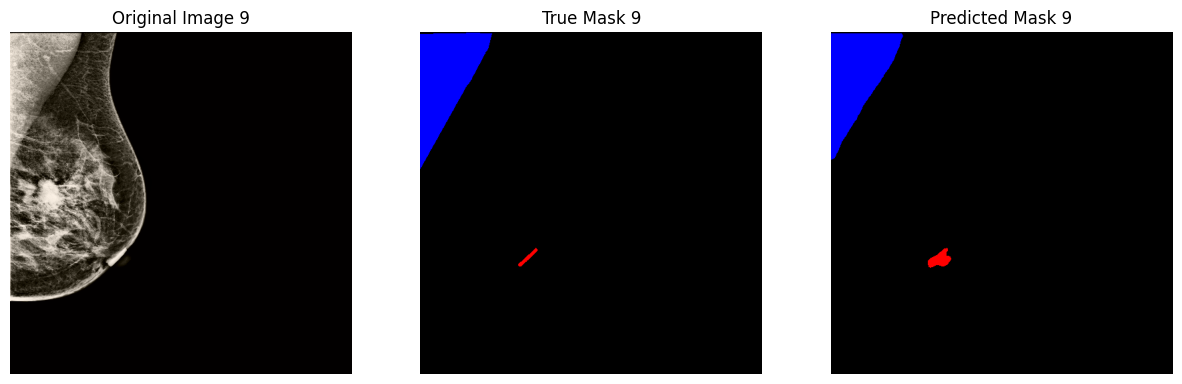

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


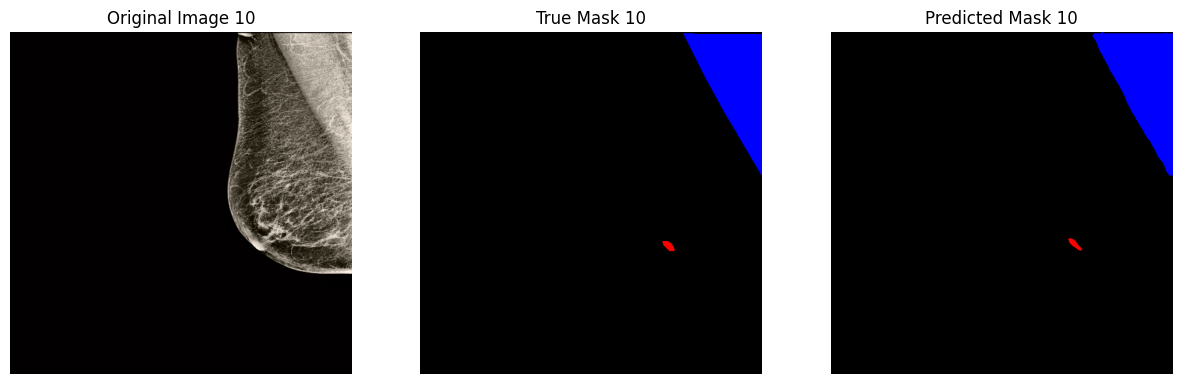

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


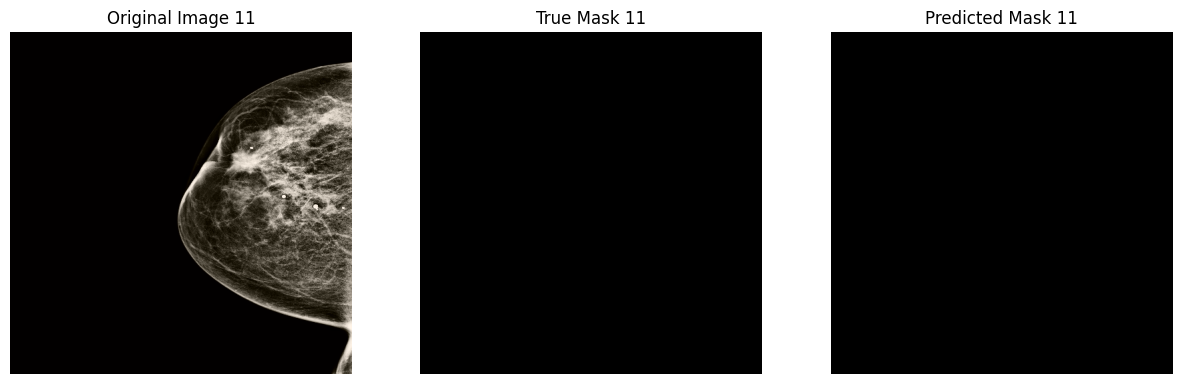

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


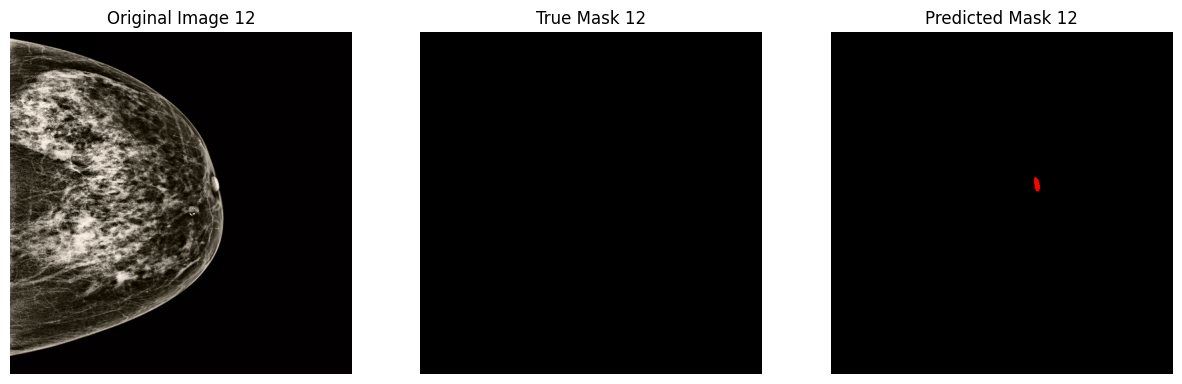

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


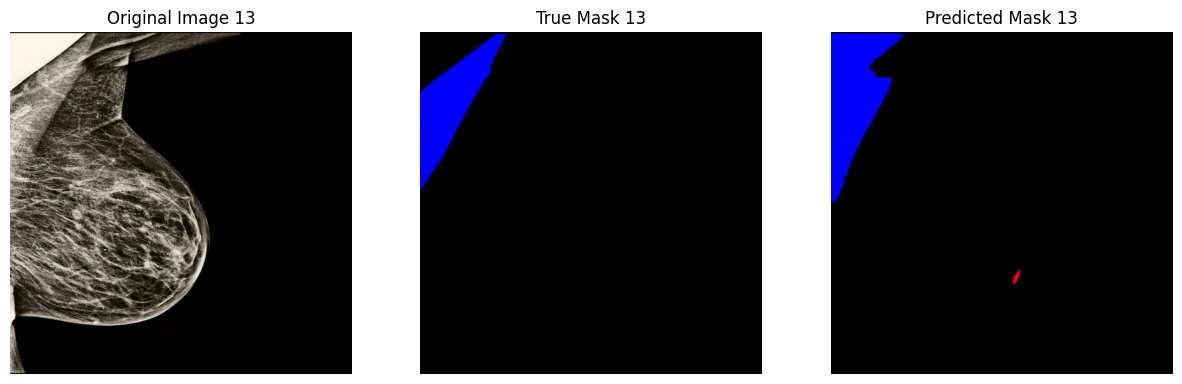

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


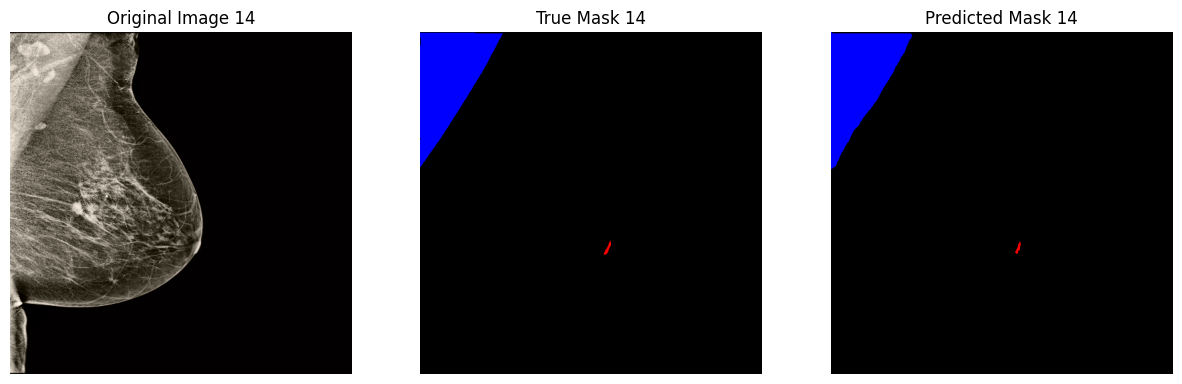

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


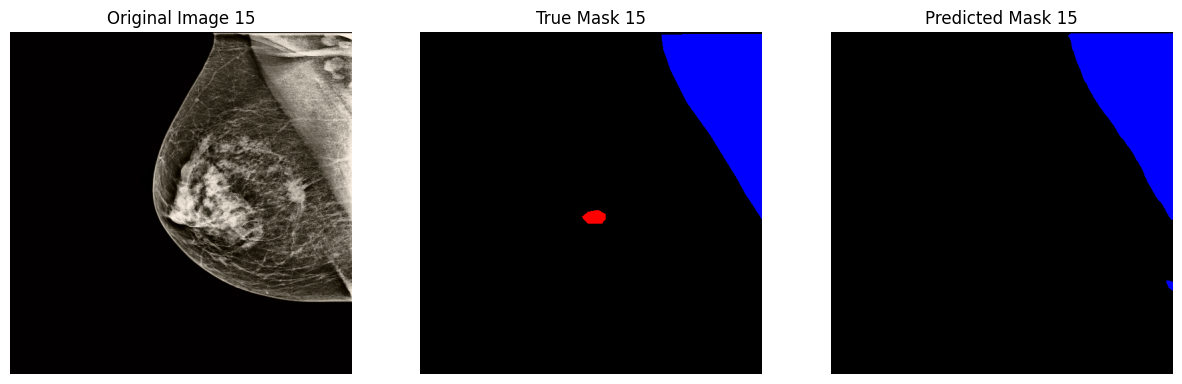

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


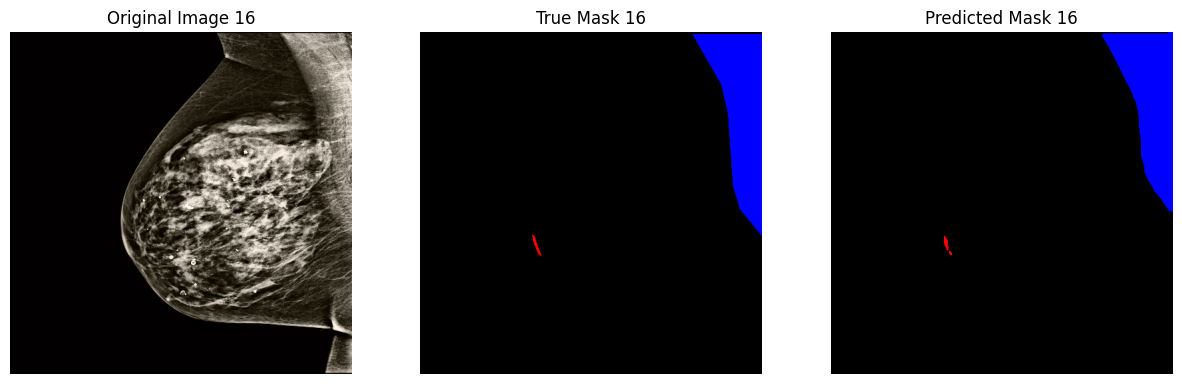

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


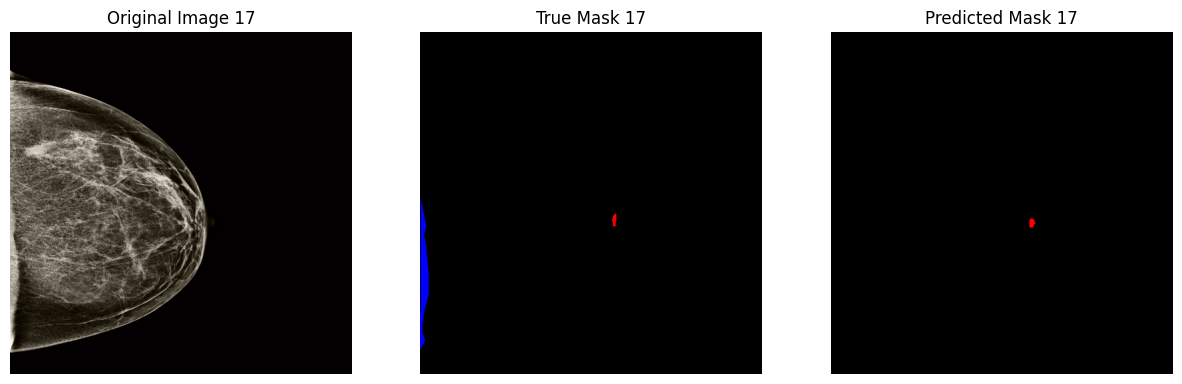

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


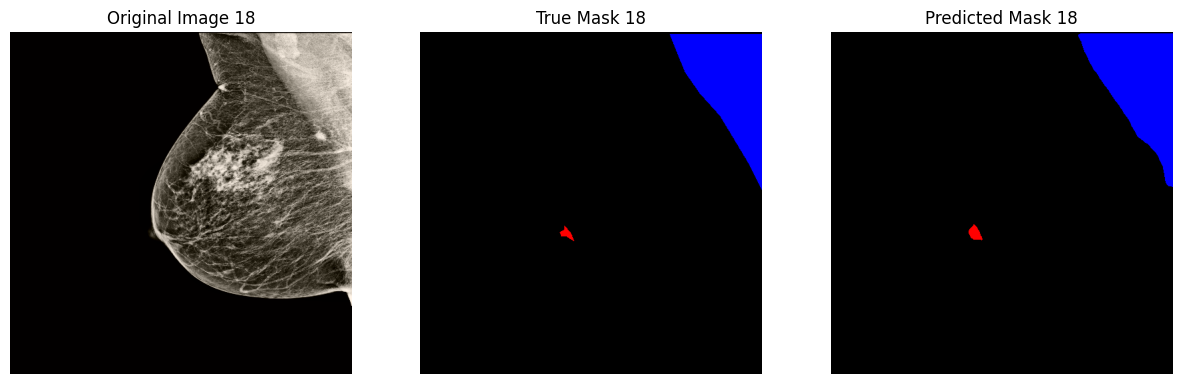

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


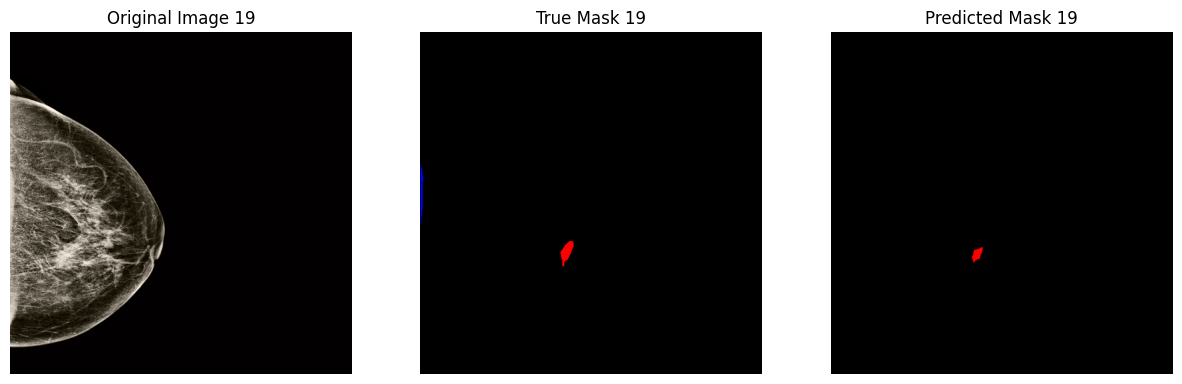

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


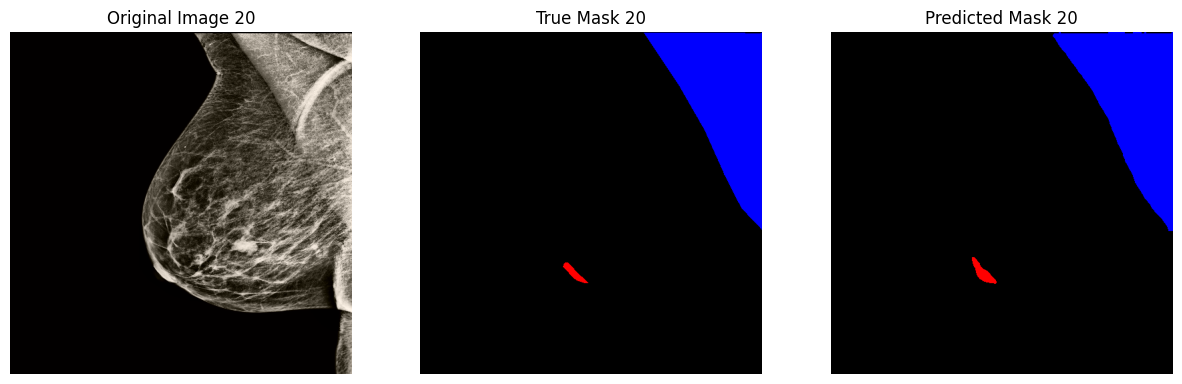

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


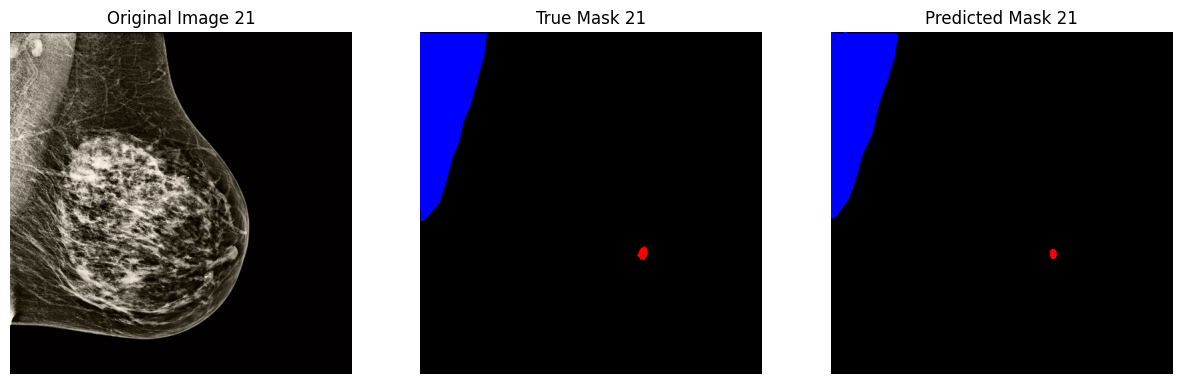

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


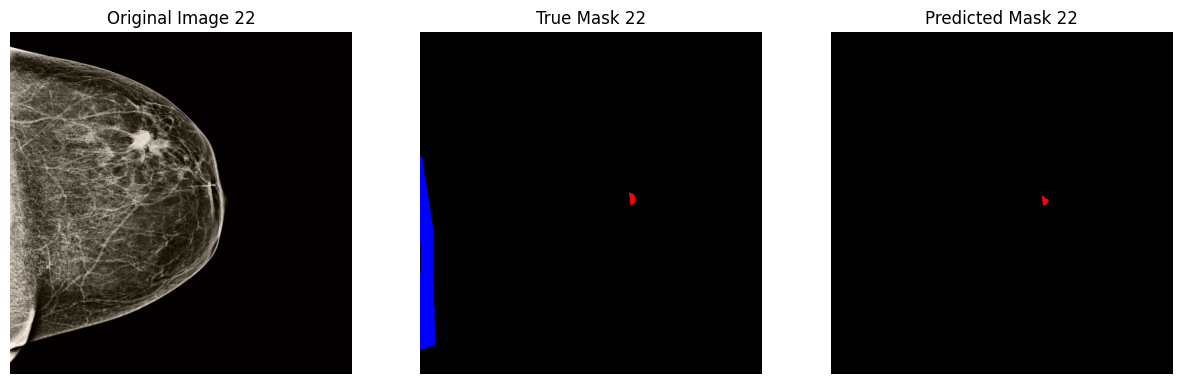

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


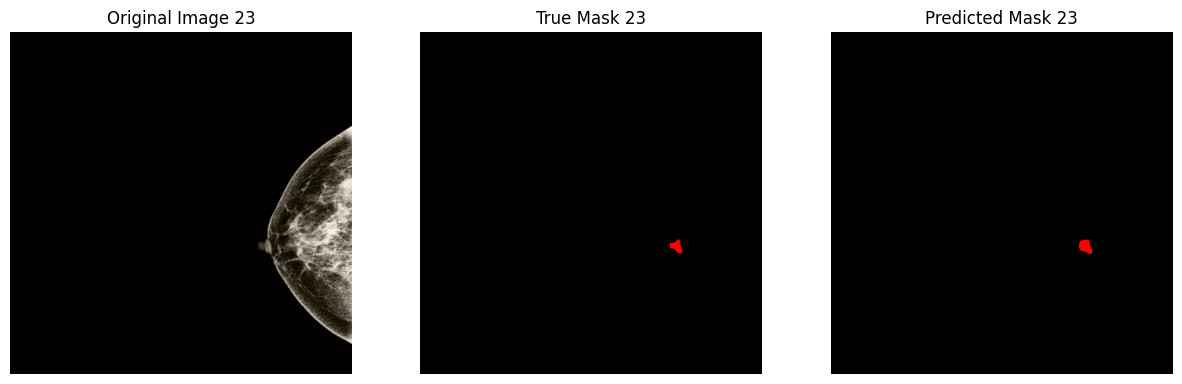

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


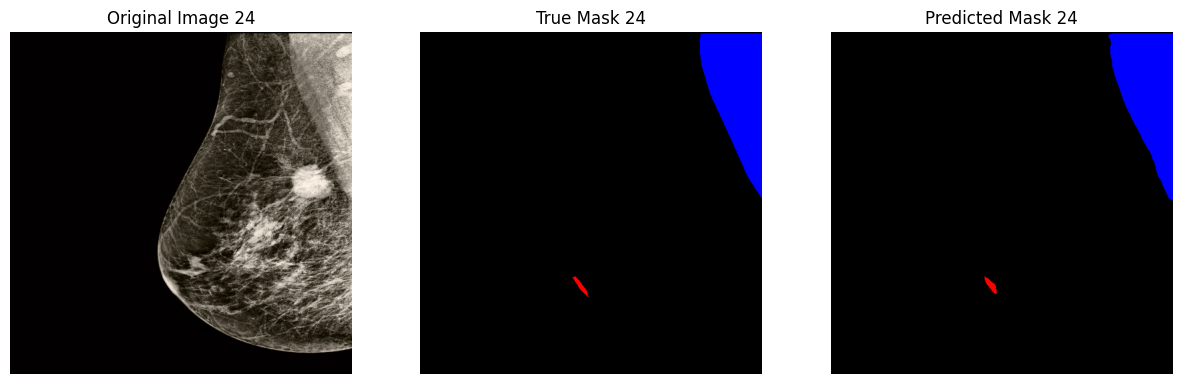

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


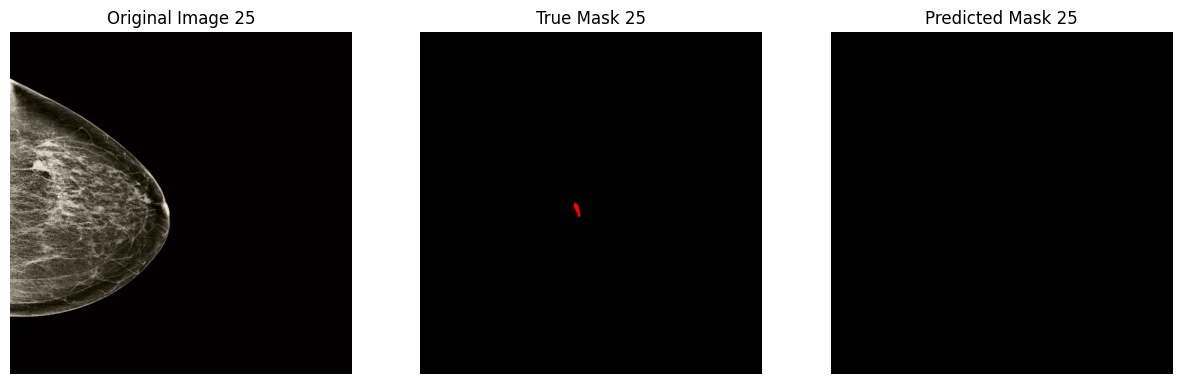

In [36]:
visualize_predictions(test_dataset, test_pred_dir)

## Inference on new images

In [6]:
# preprocess data
!python preprocess_data.py --data_mode "infer"

/home/phanthc/Chi/Data/CsawS/train_data/original_images/
Processing Images: 100%|██████████████████████████| 5/5 [00:01<00:00,  3.63it/s]
Preprocessing infer set done!


In [4]:
infer_img = INFER_IMAGE
transform = TEST_TRANSFORM
model_file = BEST_MODEL_DIR

infer_pred_dir = INFER_MASK_PRED
create_dir(infer_pred_dir)

infer_dataset = InferenceDataset(infer_img, transform)
infer_set_size = len(os.listdir(infer_img))
print(infer_set_size)

5


In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torch.load(model_file)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


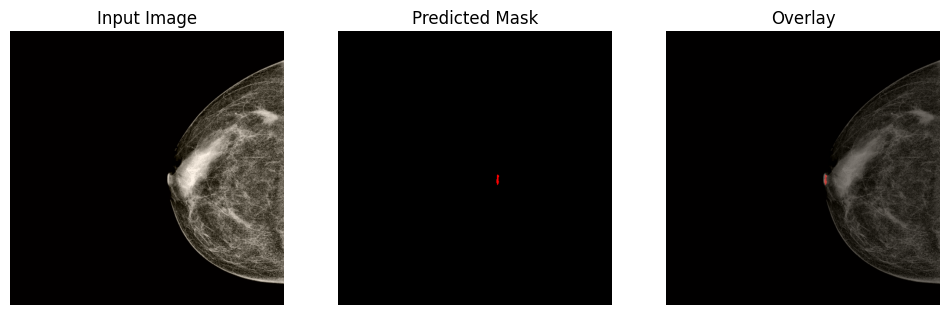

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


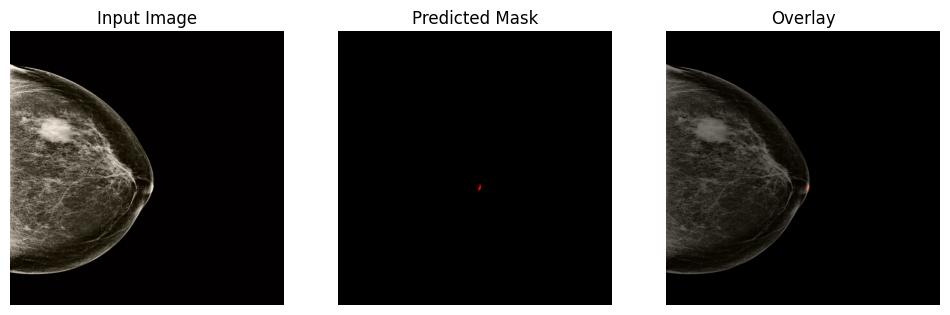

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


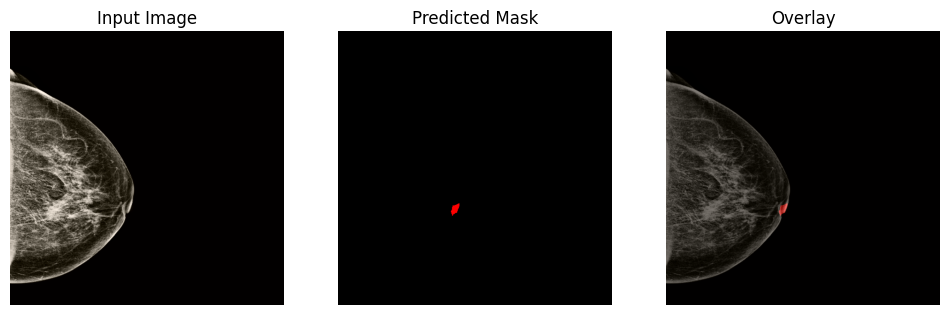

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


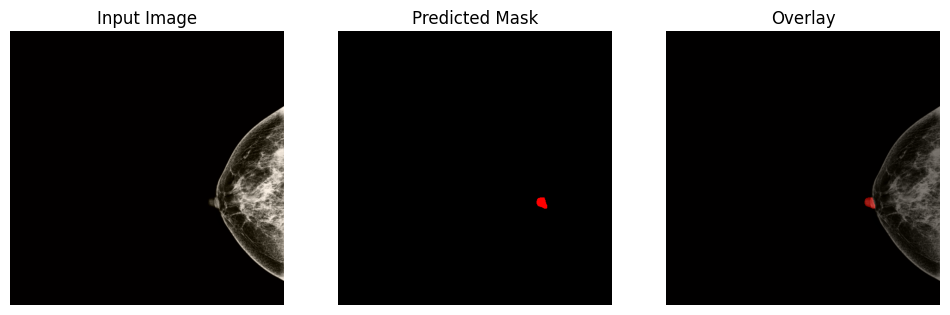

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


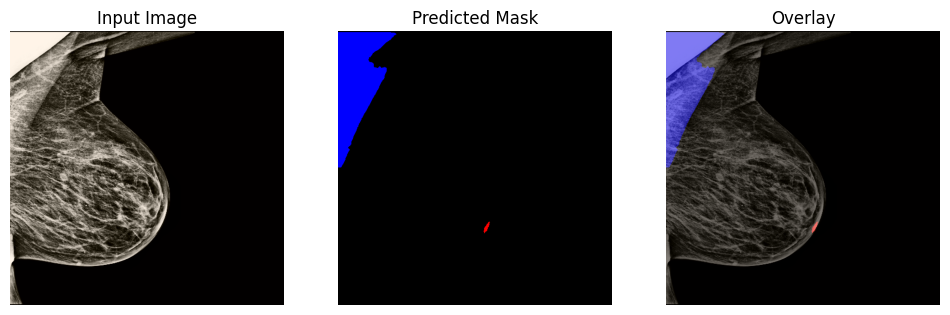

In [7]:
with torch.no_grad():
    model.eval()
    for id in range(len(infer_dataset)):
        x = infer_dataset[id]
        y_predict = F.interpolate(model(x.unsqueeze(0).to(device)), size=x.shape[1:], mode="bilinear").argmax(dim=1).squeeze().cpu().numpy()

        color_mask_predict = np.zeros((*y_predict.shape, 3), dtype=np.uint8)

        for j, color in enumerate(CUSTOM_COLORMAP):
            color_mask_predict[y_predict == j] = np.array(color)

        Image.fromarray(color_mask_predict).save(os.path.join(infer_pred_dir, f'{id}.png'))
        input_img = unorm(x).permute(1, 2, 0).cpu()
        
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 3, 1)
        plt.imshow(input_img, cmap='gray')
        plt.title("Input Image")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(color_mask_predict)
        plt.title("Predicted Mask")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(input_img)
        plt.imshow(color_mask_predict, alpha=0.5)
        plt.title("Overlay")
        plt.axis('off')

        plt.show()